In [1]:
import getpass
import os
import json
import random
import pandas as pd
from collections import Counter
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

from fastapi_agent_server import call_negotiator_model
from fastapi_agent_server import get_step_results
from langchain_mistralai import ChatMistralAI  # Import Mistral integration
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

Main next steps:

- If the deal was not resolved, email the client 
- Get input about max/min price etc. from the frontend, but have default values in place too. 
- Generate results of negotiation
- If there is disagreement - keep negotiating
-- Check the rules for negotiation 
- Several negotiations processing
- Change status of processed clients
- Send emails to all clients 
- If negotiation was successful -> positive email
-- If unsuccessful -> we didn't find a replacement -> leave it
-- add processing of buyer/seller 
- Update stock data after the negotiation!
-- Save profits data somewhere
# for profit - need regular price for that unit

FOR THE DEMO:

Add messages generated by buyer/seller 
Check the prompt
We wil integrate prior buyer's data/their historical behavior/ continuously adapting to negotiating with them 
- New sales people
- Remove bias of employee changes/ emotions

In [2]:
root_path = os.getcwd()
print(root_path)

/Users/nursulusagimbayeva/Downloads/ai_powered_client_maintanence/ai_powered_client_maintanence


Load the LLM

In [4]:
last_request = {'min_order_quantity': 15, 'max_order_quantity': 20, 'min_delivery_time': 1, 'max_delivery_time': 3, 'min_lead_time': 6, 'max_lead_time': 8, 'expected_discount': 0.05, 'product_urgency_rate': 40.0, 'customers_affected': ['88b6e3ac', '1f75dfc9', '268d3da5', '3b593322', 'fa359306', '4717e8d9', '8448c47f', '4437c510', '94c42503', '553a4615', '69333c71', '70903be5', 'f0a70d01', 'ba33778f', '04a6b77a'], 'dates_of_request': ['2025-01-03', '2025-01-03', '2025-01-04', '2025-01-11', '2025-01-18', '2025-01-20', '2025-01-30', '2025-01-31', '2025-02-02', '2025-02-10', '2025-02-12', '2025-02-13', '2025-02-18', '2025-02-20', '2025-02-21'], 'requirement_of_certification': True, 'sustainability_requirement': False, 'max_negotiation_attempts': 3, 'buyer_name': 'Viessman', 'buyer_id': '', 'buyer_type': 'Medium-Sized Business', 'negotiation_style': 'Balanced', 'price_sensitivity': 'Medium', 'product_name': 'VITOCAL 252-A (7,4 bis 18,5 kW)\n Luft-Wasser-Wärmepumpe', 'product_id': 8, 'min_unit_price': 70, 'max_unit_price': 130}

In [ ]:
last_request = {'min_order_quantity': 15, 'max_order_quantity': 20, 'min_delivery_time': 1, 'max_delivery_time': 3, 'min_lead_time': 6, 'max_lead_time': 8, 'expected_discount': 0.05, 'product_urgency_rate': 40.0, 
                # 'customers_affected': ['88b6e3ac', '1f75dfc9', '268d3da5', '3b593322', 'fa359306', '4717e8d9', '8448c47f', '4437c510', '94c42503', '553a4615', '69333c71', '70903be5', 'f0a70d01', 'ba33778f', '04a6b77a'], 
                # 'dates_of_request': ['2025-01-03', '2025-01-03', '2025-01-04', '2025-01-11', '2025-01-18', '2025-01-20', '2025-01-30', '2025-01-31', '2025-02-02', '2025-02-10', '2025-02-12', '2025-02-13', '2025-02-18', '2025-02-20', '2025-02-21'], 
                'requirement_of_certification': True, 'sustainability_requirement': False, 'max_negotiation_attempts': 3, 'buyer_name': 'Viessman', 'buyer_id': '', 'buyer_type': 'Medium-Sized Business', 'negotiation_style': 'Balanced', 'price_sensitivity': 'Medium', 'product_name': 'VITOCAL 252-A (7,4 bis 18,5 kW)\n Luft-Wasser-Wärmepumpe', 'product_id': 8, 'min_unit_price': 70, 'max_unit_price': 130}

In [5]:
last_request

{'min_order_quantity': 15,
 'max_order_quantity': 20,
 'min_delivery_time': 1,
 'max_delivery_time': 3,
 'min_lead_time': 6,
 'max_lead_time': 8,
 'expected_discount': 0.05,
 'product_urgency_rate': 40.0,
 'customers_affected': ['88b6e3ac',
  '1f75dfc9',
  '268d3da5',
  '3b593322',
  'fa359306',
  '4717e8d9',
  '8448c47f',
  '4437c510',
  '94c42503',
  '553a4615',
  '69333c71',
  '70903be5',
  'f0a70d01',
  'ba33778f',
  '04a6b77a'],
 'dates_of_request': ['2025-01-03',
  '2025-01-03',
  '2025-01-04',
  '2025-01-11',
  '2025-01-18',
  '2025-01-20',
  '2025-01-30',
  '2025-01-31',
  '2025-02-02',
  '2025-02-10',
  '2025-02-12',
  '2025-02-13',
  '2025-02-18',
  '2025-02-20',
  '2025-02-21'],
 'requirement_of_certification': True,
 'sustainability_requirement': False,
 'max_negotiation_attempts': 3,
 'buyer_name': 'Viessman',
 'buyer_id': '',
 'buyer_type': 'Medium-Sized Business',
 'negotiation_style': 'Balanced',
 'price_sensitivity': 'Medium',
 'product_name': 'VITOCAL 252-A (7,4 bis 1

In [5]:
RESULTS = get_step_results(last_request)

get_product_demand_forecast
json.loads
parsed_response {'current_demand': 'High', 'action': '+15%'}
Step 0 Output: {'get_product_demand_forecast': {'product_demand_forecast': {'current_demand': 'High', 'action': '+15%'}}}
identify_buyer_profile
Step 1 Output: {'identify_buyer_profile': {'buyer_type': 'Medium-Sized Business', 'negotiation_style': 'Balanced', 'price_sensitivity': 'Medium'}}
initiate_negotiation
json.loads
negotiation_offer_buyer {'price_per_unit': 100, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit'}
send_negotiation_offer
prompt = ChatPromptTemplate.from_messages
json.loads
parsed_response {
    "agreement_reached": false,
    "negotiation_offer_seller": {
        "price_per_unit": 120,
        "lead_time": 10,
        "order_quantity": 20,
        "payment_terms": "upfront"
    }
}
parsed_response {'agreement_reached': False, 'negotiation_offer_seller': {'price_per_unit': 120, 'lead_time': 10, 'order_quantity': 20, 'payment_terms': 'upfront'}}
Step 2 Ou

In [5]:
RESULTS[-1]

{'error': 'Internal server error'}

In [ ]:
final_deal {'buyer_name': 'Viessman', 'buyer_id': '', 'buyer_type': 'Medium-Sized Business', 'negotiation_style': 'Balanced', 'price_sensitivity': 'Medium', 'product_name': 'VITOCAL 252-A (7,4 bis 18,5 kW)\n Luft-Wasser-Wärmepumpe', 'product_id': 8, 'min_unit_price': 70, 'max_unit_price': 130, 'min_delivery_time': 1, 'max_delivery_time': 3, 'min_lead_time': 6, 'max_lead_time': 8, 'min_order_quantity': 15, 'max_order_quantity': 20, 'expected_discount': 0.05, 'requirement_of_certification': True, 'sustainability_requirement': False, 'product_urgency_rate': 40.0, 'product_demand_forecast': {'current_demand': 'Medium', 'action': '+5%'}, 'current_negotiation_offer_buyer': {'price_per_unit': 107, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}, 'current_negotiation_offer_seller': {'price_per_unit': 107.5, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit'}, 'negotiation_history_buyer': {'attempt_0': {'price_per_unit': 100, 'lead_time': 7, 'order_quantity': 18, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}, 'attempt_1': {'price_per_unit': 105, 'lead_time': 7, 'order_quantity': 19, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}, 'attempt_2': {'price_per_unit': 107, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}}, 'negotiation_history_seller': {'attempt_0': {'price_per_unit': 110, 'lead_time': 7, 'order_quantity': 18, 'payment_terms': 'credit'}, 'attempt_1': {'price_per_unit': 108, 'lead_time': 7, 'order_quantity': 19, 'payment_terms': 'credit'}, 'attempt_2': {'price_per_unit': 107.5, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit'}}, 'negotiation_id': '20250316102537', 'negotiation_attempts': 3, 'max_negotiation_attempts': 3, 'agreement_reached': False}


In [29]:
RESULTS[-1]

{'continue_negotiation': {'negotiation_id': '20250316083902',
  'negotiation_attempts': 3,
  'current_negotiation_offer_buyer': {'price_per_unit': 106,
   'lead_time': 6,
   'order_quantity': 15,
   'payment_terms': 'credit',
   'negotiation_id': '20250316083902'},
  'current_negotiation_offer_seller': {'price_per_unit': 107,
   'lead_time': 5,
   'order_quantity': 15,
   'payment_terms': 'credit'},
  'agreement_reached': False,
  'negotiation_history_buyer': {'attempt_0': {'price_per_unit': 100,
    'lead_time': 7,
    'order_quantity': 13,
    'payment_terms': 'credit',
    'negotiation_id': '20250316083902'},
   'attempt_1': {'price_per_unit': 105,
    'lead_time': 6,
    'order_quantity': 15,
    'payment_terms': 'credit',
    'negotiation_id': '20250316083902'},
   'attempt_2': {'price_per_unit': 106,
    'lead_time': 6,
    'order_quantity': 15,
    'payment_terms': 'credit',
    'negotiation_id': '20250316083902'}},
  'negotiation_history_seller': {'attempt_0': {'price_per_unit'

In [5]:
os.environ["MISTRAL_API_KEY"] = os.getenv('MISTRAL_API_KEY')

# Instantiate the Mistral LLM
llm = ChatMistralAI(
    model="mistral-large-latest",  # Replace with your desired Mistral model
    temperature=0.7,
    max_retries=3,
)

In [6]:
### Read id to product
with open('data/id_to_product.json', 'r') as f:
    id_to_product = json.load(f)
    
### Read id to product
with open('data/product_to_vendor.json', 'r') as f:
    product_to_vendor = json.load(f)

In [7]:
# Graph state
class State(TypedDict):
    clients_requests: pd.DataFrame
    vendors: pd.DataFrame
    df_deals_closed: pd.DataFrame
    fronted_input: dict
    company_negotiation_msg: str
    vendor_negotiation_msg: str
    negotiation_decision_company: str # decision of the company [accept_offer, keep_negotiation, reject_offer]
    negotiation_decision_vendor: str # decision of the vendor [accept_offer, keep_negotiation, reject_offer]
    send_confirmation_email: bool # whether we send an email to the client
    start_negotiation: bool
    message_to_the_client: str # for generating an email to client
    current_client: str # for generating an email to client
    product_id: int # what product are we talking about
    date_of_request: str # for generating an email to client
    negotiation_requests: dict # a collection of negotiation requests to process
    negotiation_attempts: int # number of attempts to negotiate 
    agreement_reached: bool
    company_offer: str
    vendor_offer: str
    # TODO: need to save a list of clients affected by negotiation
    # TODO: can we do negotations in parallel 
    # TODO: add a notification/status that human intervention is needed

TODO: add calendly invite to the user email

TODO: emergency scale

In [18]:
# df.loc[df["Client ID"] == '6a688622', "Solved"] = True 

In [8]:
# Nodes
# def get_product_request(state: State):

def load_dataframe(state: State):
    ### TODO: replace with the access to the database
    """Loads the DataFrame at the start of the workflow."""
    print('loading dataframes')
    df = pd.read_csv("data/client_requests.csv")  # Load your dataset
    df_vendors = pd.read_csv("data/vendors.csv")
    df_deals_closed = pd.read_csv('data/df_deals_closed.csv')
    return {"clients_requests": df, 'vendors': df_vendors, 'df_deals_closed': df_deals_closed}

def read_fronted_input(state: State):
    ### TODO: Somehow we get fronted data
    if state['fronted_input']['type'] == 'client_check':
        # TODO: for now we get last client, in the future get all the params from fronted
        print('loading client data')
        data = state['clients_requests']
        product_id = data.iloc[-1]['Product']
        client_id = data.iloc[-1]['Client ID']
        date_of_request = data.iloc[-1]['Date of request']
        return {"product_id": product_id, 'current_client': client_id, 'date_of_request': date_of_request}
    elif state['fronted_input']['type'] == 'negotiation':
        return {'start_negotiation': True}
        
def check_frontend_input(state):
    print('check_frontend_input')
    fronted_input = state.get("fronted_input", {})  # Default to an empty dictionary if missing
    return "need_check_inventory" if fronted_input.get("type") == "client" else "start_negotiating"


def load_last_client(state: State):
    """Loads the last client data."""
    print('loading last client')
    ### TODO: add a case when the last clients request was already processed -> write something like "Already solved"
    data = state['clients_requests']
    product_id = data.iloc[-1]['Product']
    client_id = data.iloc[-1]['Client ID']
    date_of_request = data.iloc[-1]['Date of request']
    return {"product_id": product_id, 'current_client': client_id, 'date_of_request': date_of_request}
    
def update_dataframe(state: State):
    """Updates the DataFrame with new information."""
    df = state["df"]  # Access the dataframe
    new_row = {"column1": "value1", "column2": "value2"}  # Example update
    df = df.append(new_row, ignore_index=True)  # Update it
    return {"clients_requests": df}  # Return the updated DataFrame

def check_inventory(state: State):
    """Check if there is inventory in stock. Only call if the request was about client"""
    print('checking the inventory')
    vendors = state['vendors']
    product_id = state['product_id']
    df_product_vendor = vendors[vendors['Product ID'] == product_id]
    if df_product_vendor['inventory'].iloc[0] > 5: 
        return {"send_confirmation_email": True, "start_negotiation": False}
    elif 5 >= df_product_vendor['inventory'].iloc[0] > 0: 
        return {"send_confirmation_email": True, "start_negotiation": True}
    
    ### TODO: Make it recursive/ more beautiful
    else:
        # if the replacement is available, but the current product is out of stock -> start negotiation for current product_ID 
        # TODO: might need to negotiation for several missing/deficite products
        if str(vendors[vendors["Product ID"] == int(df_product_vendor['Replacement'])]['inventory'].iloc[0]) == 'nan': 
            return {"send_confirmation_email": False, "start_negotiation": True}
        else: 
            return {"send_confirmation_email": True, "start_negotiation": True}

def solve_client_case(state: State):
    print("solve_client_case")
    data = state['clients_requests']
    client_id = state['current_client']
    data.loc[data["Client ID"] == client_id, "Solved"] = True 
    return {'client_resolved': True, 'vendors': data}
        
        
def check_send_confirmation_email(state):
    print('check_send_confirmation_email')

    return "write_email" if state.get("") else "not_write_email"

def check_start_negotiation(state):
    print('check_start_negotiation')
    return "starting_negotiation" if state.get("start_negotiation") else "not_start_negotiation"

# Nodes
def generate_email_client(state: State):
    # TODO: ugly (str(int()))
    """Write an email to the client confirming the order and specifying the expected time"""
    print('generate_email_client')
    email = f'''Dear Client {state['current_client']},
    
    We are writing to provide you with an update on your maintenance request from {state['date_of_request']}.

    The status for f{id_to_product[str(int(state['product_id']))]} has been updated to: COMPLETED
    Last Updated: 3/15/2025

    Please don't hesitate to contact us if you have any questions.

    Best regards,
    Maintenance Team
    '''
    return {"message_to_the_client": email}


def process_data_for_negotiation(state: State):
    '''
    Prepare negotiation requests.
    '''
    print('process_data_for_negotiation')
    data = state['clients_requests']
    data["Solved"] = data["Solved"].astype(bool)
    unsolved_data = data[data["Solved"] == False]
    # Aggregate by Product (counting the number of requests per product)
    aggregated_df = unsolved_data.groupby("Product").agg(lambda x: list(x)).reset_index()
    
    negotiation_requests = dict()
    for product in aggregated_df['Product']:
        df_product = aggregated_df[aggregated_df['Product'] == product]
        volume = len(df_product['Client ID'].iloc[0])
        negotiation_requests[product] = {
            'min_order_quantity': volume,
            'max_order_quantity': volume+5,
            'min_delivery_time': 1,
            'max_delivery_time': 3,
            'min_lead_time': 6,
            'max_lead_time': 8,
            'expected_discount': 0.05,
            'product_urgency_rate': round(Counter(df_product['Emergency'].iloc[0])['yes']/volume*100, 1),
            'customers_affected': list(df_product['Client ID'].iloc[0]),
            'dates_of_request': list(df_product['Date of request'].iloc[0]),
            'requirement_of_certification': True,
            'sustainability_requirement': False,
            'max_negotiation_attempts': 3,
            "buyer_name": product_to_vendor[str(product)],
            "buyer_id": "",
            "buyer_type": "Medium-Sized Business",
            "negotiation_style": "Balanced",
            "price_sensitivity": "Medium",
            "product_name": id_to_product[str(product)],
            "product_id": product,
            "min_unit_price": 70,
            "max_unit_price": 130,
            
        }
        
    return {'negotiation_requests': negotiation_requests}
    
    
### TODO: Create a separate CSV - temporary
### Add a column - Solved/Unsolved


def starting_negotiation(state: State):
    print('starting_negotiation')

    # TODO: think of more factors to include
    # TODO: next step = Weights - input from the manager 
    # What criteria we need to stop the negotiation?
    # TODO: next step = several decision participants 
    
    negotiation_requests = state['negotiation_requests']
    # TODO: implement parallel processing of requests. for now testing one
    
    last_request = list(negotiation_requests.items())[-1][1]
    
    print('last negotiation request', last_request)
    print(type(last_request))
    
    print('initiating the negotiation')

    results = get_step_results(last_request)
    
    # TODO: need to save the deal results dynamically somehow
    
    final_deal = results[-1]
    
    print("final_deal", final_deal)
    
    current_negotiation_offer_buyer = final_deal['continue_negotiation']['current_negotiation_offer_buyer']
    
    current_negotiation_offer_seller = final_deal['continue_negotiation']['current_negotiation_offer_seller']
    
    # Define new row data as a dictionary
    new_row = {
        "Negotiation ID": final_deal['continue_negotiation']['negotiation_id'],
        "Vendor name": last_request['buyer_name'],
        "Product ID": last_request['product_id'],
        "Product name": last_request['product_name'],
        "Offer (buyer)": f'''Price per Unit: {current_negotiation_offer_buyer['price_per_unit']},
        Volume: {current_negotiation_offer_buyer['order_quantity']},
        Lead time: {current_negotiation_offer_buyer['lead_time']},
        Payment terms: {current_negotiation_offer_buyer['payment_terms']},
        ''',
        "Offer (vendor)": f'''Price per Unit: {current_negotiation_offer_seller['price_per_unit']},
        Volume: {current_negotiation_offer_seller['order_quantity']},
        Lead time: {current_negotiation_offer_seller['lead_time']},
        Payment terms: {current_negotiation_offer_seller['payment_terms']},
        ''',
        "Status": "Closed", #TODO: change in PROGRESS
        "Agreement reached": final_deal['continue_negotiation']['agreement_reached'],
        "Profit": 50, #TODO: calculate the profits
    }

    # Convert the dictionary to a DataFrame row
    new_row_df = pd.DataFrame([new_row])

    # Append the new row to the DataFrame
    df_deals_closed = pd.concat([df_deals_closed, new_row_df], ignore_index=True)
   
    # Save to CSV immediately
    df_deals_closed.to_csv("data/df_deals_closed.csv", index=False)
        
    
    print('updated the dealflow')
    # human in the loop - human receives a notification - negotiate again.
    # if vendor accepted our offer -> update stock; send email to the user (if required);  track our profits 
    # long time Customers
    
    return {'df_deals_closed': df_deals_closed}

# def parse_numbers:
#     ''' parse offer and return offer '''


# def deal_closed(state: State)

In [32]:
# final_deal {'buyer_name': 'Viessman', 'buyer_id': '', 'buyer_type': 'Medium-Sized Business', 'negotiation_style': 'Balanced', 'price_sensitivity': 'Medium', 'product_name': 'VITOCAL 252-A (7,4 bis 18,5 kW)\n Luft-Wasser-Wärmepumpe', 'product_id': 8, 'min_unit_price': 70, 'max_unit_price': 130, 'min_delivery_time': 1, 'max_delivery_time': 3, 'min_lead_time': 6, 'max_lead_time': 8, 'min_order_quantity': 15, 'max_order_quantity': 20, 'expected_discount': 0.05, 'requirement_of_certification': True, 'sustainability_requirement': False, 'product_urgency_rate': 40.0, 'product_demand_forecast': {'current_demand': 'Medium', 'action': '+5%'}, 'current_negotiation_offer_buyer': {'price_per_unit': 107, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}, 'current_negotiation_offer_seller': {'price_per_unit': 107.5, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit'}, 'negotiation_history_buyer': {'attempt_0': {'price_per_unit': 100, 'lead_time': 7, 'order_quantity': 18, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}, 'attempt_1': {'price_per_unit': 105, 'lead_time': 7, 'order_quantity': 19, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}, 'attempt_2': {'price_per_unit': 107, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit', 'negotiation_id': '20250316102537'}}, 'negotiation_history_seller': {'attempt_0': {'price_per_unit': 110, 'lead_time': 7, 'order_quantity': 18, 'payment_terms': 'credit'}, 'attempt_1': {'price_per_unit': 108, 'lead_time': 7, 'order_quantity': 19, 'payment_terms': 'credit'}, 'attempt_2': {'price_per_unit': 107.5, 'lead_time': 7, 'order_quantity': 20, 'payment_terms': 'credit'}}, 'negotiation_id': '20250316102537', 'negotiation_attempts': 3, 'max_negotiation_attempts': 3, 'agreement_reached': False}


Workflow

start
add nodes
add edges
compile
display


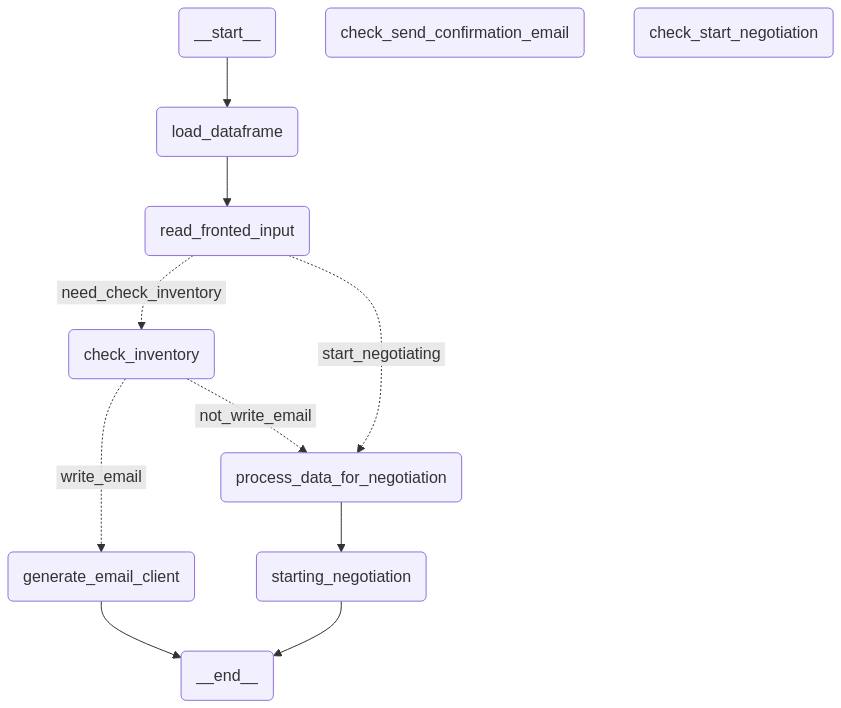

In [9]:
# Add input coming from Frontend
# Client check?
# Negotiation 

# Build workflow
print('start')
workflow = StateGraph(State)

# Add nodes
print('add nodes')
workflow.add_node("load_dataframe", load_dataframe)  # Load DataFrame first
workflow.add_node("read_fronted_input", read_fronted_input)
workflow.add_node("check_inventory", check_inventory)
workflow.add_node("check_send_confirmation_email", check_send_confirmation_email)
workflow.add_node("check_start_negotiation", check_start_negotiation)
workflow.add_node("generate_email_client", generate_email_client)
workflow.add_node('process_data_for_negotiation', process_data_for_negotiation)
workflow.add_node("starting_negotiation", starting_negotiation)
# workflow.add_node("parse_numbers", parse_numbers)


# Add edges to connect nodes

# Start by processing the last client data
print('add edges')
# Start by loading the dataframe
workflow.add_edge(START, "load_dataframe")
# After loading, check the inventory 
workflow.add_edge("load_dataframe", "read_fronted_input")

# if the input is client -> check inventory, if negotiation request -> start negotiation
workflow.add_conditional_edges(
    "read_fronted_input", check_frontend_input, {"need_check_inventory": "check_inventory", "start_negotiating": 'process_data_for_negotiation'}
)   

# If inventory was sufficient -> write an email to client, if not - start negotiating
workflow.add_conditional_edges(
    "check_inventory", check_send_confirmation_email, {"write_email": "generate_email_client", "not_write_email": 'process_data_for_negotiation'}
)   


workflow.add_edge("process_data_for_negotiation", "starting_negotiation")

# If the negotiation is successful, send emails to clients
workflow.add_edge("starting_negotiation", END)

# TODO: add parsing deals numbers
# workflow.add_edge("parse_deals", "response_vendor")

# workflow.add_conditional_edges(
#     "response_vendor",
#     lambda state: "generate_email_client" if state.get("agreement_reached") else (
#         "END" if state.get("negotiation_attempts", 0) >= 3 else "company_negotiation"
#     ),
#     {"generate_email_client": "generate_email_client", "END": END, "company_negotiation": "company_negotiation"}
# )


# After company negotiation, parse new deal terms before going back to the vendor
# workflow.add_edge("company_negotiation", "parse_deals")

# Continue to contract signing if agreement is reached
# workflow.add_edge("sign_a_contract", END)


workflow.add_edge("generate_email_client", END)

# Compile
print('compile')
chain = workflow.compile()

print('display')
# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

Need a logic when 
- rejection
- keep negotiating


Change status to "In progress"

In [10]:
initial_state = State({  
    "negotiation_attempts": 0,
    "fronted_input": {'type': 'negotiation'},
    "agreement_reached": None,  
    # Add any other necessary keys and initial values
})

final_state = chain.invoke(initial_state)

loading dataframes
check_frontend_input
process_data_for_negotiation
starting_negotiation
last negotiation request {'min_order_quantity': 15, 'max_order_quantity': 20, 'min_delivery_time': 1, 'max_delivery_time': 3, 'min_lead_time': 6, 'max_lead_time': 8, 'expected_discount': 0.05, 'product_urgency_rate': 40.0, 'customers_affected': ['88b6e3ac', '1f75dfc9', '268d3da5', '3b593322', 'fa359306', '4717e8d9', '8448c47f', '4437c510', '94c42503', '553a4615', '69333c71', '70903be5', 'f0a70d01', 'ba33778f', '04a6b77a'], 'dates_of_request': ['2025-01-03', '2025-01-03', '2025-01-04', '2025-01-11', '2025-01-18', '2025-01-20', '2025-01-30', '2025-01-31', '2025-02-02', '2025-02-10', '2025-02-12', '2025-02-13', '2025-02-18', '2025-02-20', '2025-02-21'], 'requirement_of_certification': True, 'sustainability_requirement': False, 'max_negotiation_attempts': 3, 'buyer_name': 'Viessman', 'buyer_id': '', 'buyer_type': 'Medium-Sized Business', 'negotiation_style': 'Balanced', 'price_sensitivity': 'Medium', 

KeyError: 'continue_negotiation'

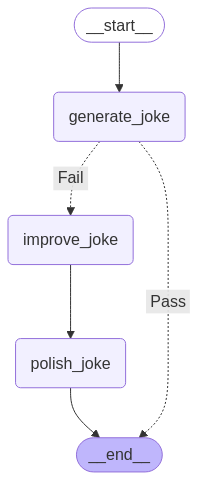

HTTPStatusError: Error response 429 while fetching https://api.mistral.ai/v1/chat/completions: {"message":"Requests rate limit exceeded"}

In [ ]:
# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str

# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"

def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")

start
add nodes
add edges
compile
display


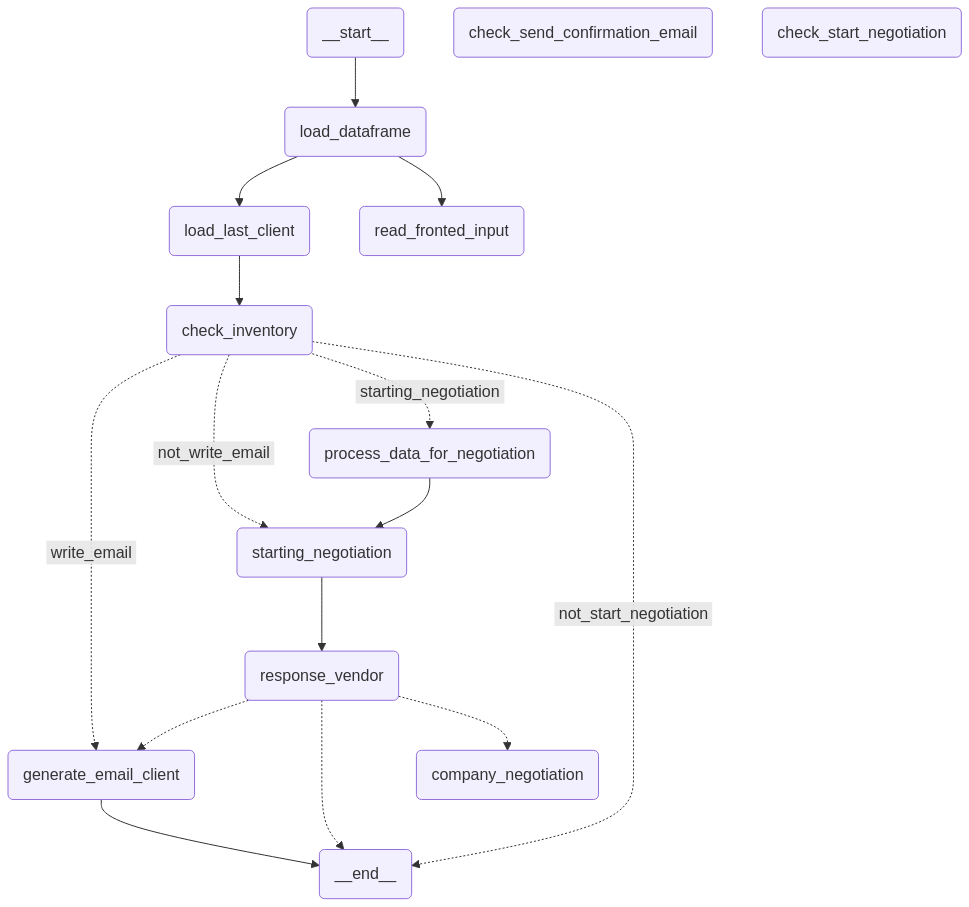

In [96]:
# Add input coming from Frontend
# Client check?
# Negotiation 

# Build workflow
print('start')
workflow = StateGraph(State)

# Add nodes
print('add nodes')
workflow.add_node("load_dataframe", load_dataframe)  # Load DataFrame first
workflow.add_node("read_fronted_input", read_fronted_input)
workflow.add_node("load_last_client", load_last_client)  # Load DataFrame first
workflow.add_node("check_inventory", check_inventory)
workflow.add_node("check_send_confirmation_email", check_send_confirmation_email)
workflow.add_node("check_start_negotiation", check_start_negotiation)
workflow.add_node("generate_email_client", generate_email_client)
workflow.add_node('process_data_for_negotiation', process_data_for_negotiation)
workflow.add_node("starting_negotiation", starting_negotiation)
workflow.add_node("company_negotiation", company_negotiation)
workflow.add_node("response_vendor", response_vendor)
# workflow.add_node("parse_numbers", parse_numbers)


# Add edges to connect nodes

# Start by processing the last client data
print('add edges')
# Start by loading the dataframe
workflow.add_edge(START, "load_dataframe")
# After loading, check the inventory 
workflow.add_edge("load_dataframe", "read_fronted_input")
# Check if it was negotiation/client
workflow.add_conditional_edges(
    "check_inventory", check_send_confirmation_email, {"write_email": "generate_email_client", "not_write_email": 'starting_negotiation'}
)   

workflow.add_edge("load_dataframe", "load_last_client")
workflow.add_edge("load_last_client", "check_inventory")
# workflow.add_conditional_edges(
#     "check_inventory", check_send_confirmation_email, {"write_email": "generate_email_client", "not_write_email": 'starting_negotiation'}
# )   

workflow.add_conditional_edges(
    "check_inventory", check_start_negotiation, {"starting_negotiation": "process_data_for_negotiation", "not_start_negotiation": END}
)        
workflow.add_edge("process_data_for_negotiation", "starting_negotiation")

workflow.add_edge("starting_negotiation", "response_vendor")
# TODO: add parsing deals numbers
# workflow.add_edge("parse_deals", "response_vendor")

workflow.add_conditional_edges(
    "response_vendor",
    lambda state: "generate_email_client" if state["agreement_reached"] else (
        END if state["negotiation_attempts"] >= 3 else "company_negotiation"
    ),
    {"generate_email_client": "generate_email_client", END: END, "company_negotiation": "company_negotiation"}
)

# After company negotiation, parse new deal terms before going back to the vendor
# workflow.add_edge("company_negotiation", "parse_deals")

# Continue to contract signing if agreement is reached
# workflow.add_edge("sign_a_contract", END)


workflow.add_edge("generate_email_client", END)

# Compile
print('compile')
chain = workflow.compile()

print('display')
# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

OLD FUNCTIONS

In [42]:
########


# Nodes
# def get_product_request(state: State):

def load_dataframe(state: State):
    ### TODO: replace with the access to the database
    """Loads the DataFrame at the start of the workflow."""
    print('loading dataframes')
    df = pd.read_csv("data/client_requests.csv")  # Load your dataset
    df_vendors = pd.read_csv("data/vendors.csv")
    return {"clients_requests": df, 'vendors': df_vendors}

def read_fronted_input(state: State):
    ### TODO: Somehow we get fronted data
    if state['fronted_input']['type'] == 'client_check':
        # TODO: for now we get last client, in the future get all the params from fronted
        print('loading client data')
        data = state['clients_requests']
        product_id = data.iloc[-1]['Product']
        client_id = data.iloc[-1]['Client ID']
        date_of_request = data.iloc[-1]['Date of request']
        return {"product_id": product_id, 'current_client': client_id, 'date_of_request': date_of_request}
    elif state['fronted_input']['type'] == 'negotiation':
        return {'start_negotiation': True}
        
def check_frontend_input(state):
    print('check_frontend_input')
    fronted_input = state.get("fronted_input", {})  # Default to an empty dictionary if missing
    return "need_check_inventory" if fronted_input.get("type") == "client" else "start_negotiating"


def load_last_client(state: State):
    """Loads the last client data."""
    print('loading last client')
    ### TODO: add a case when the last clients request was already processed -> write something like "Already solved"
    data = state['clients_requests']
    product_id = data.iloc[-1]['Product']
    client_id = data.iloc[-1]['Client ID']
    date_of_request = data.iloc[-1]['Date of request']
    return {"product_id": product_id, 'current_client': client_id, 'date_of_request': date_of_request}
    
def update_dataframe(state: State):
    """Updates the DataFrame with new information."""
    df = state["df"]  # Access the dataframe
    new_row = {"column1": "value1", "column2": "value2"}  # Example update
    df = df.append(new_row, ignore_index=True)  # Update it
    return {"clients_requests": df}  # Return the updated DataFrame

def check_inventory(state: State):
    """Check if there is inventory in stock. Only call if the request was about client"""
    print('checking the inventory')
    vendors = state['vendors']
    product_id = state['product_id']
    df_product_vendor = vendors[vendors['Product ID'] == product_id]
    if df_product_vendor['inventory'].iloc[0] > 5: 
        return {"send_confirmation_email": True, "start_negotiation": False}
    elif 5 >= df_product_vendor['inventory'].iloc[0] > 0: 
        return {"send_confirmation_email": True, "start_negotiation": True}
    
    ### TODO: Make it recursive/ more beautiful
    else:
        # if the replacement is available, but the current product is out of stock -> start negotiation for current product_ID 
        # TODO: might need to negotiation for several missing/deficite products
        if str(vendors[vendors["Product ID"] == int(df_product_vendor['Replacement'])]['inventory'].iloc[0]) == 'nan': 
            return {"send_confirmation_email": False, "start_negotiation": True}
        else: 
            return {"send_confirmation_email": True, "start_negotiation": True}

def solve_client_case(state: State):
    print("solve_client_case")
    data = state['clients_requests']
    client_id = state['current_client']
    data.loc[data["Client ID"] == client_id, "Solved"] = True 
    return {'client_resolved': True, 'vendors': data}
        
        
def check_send_confirmation_email(state):
    print('check_send_confirmation_email')

    return "write_email" if state.get("") else "not_write_email"

def check_start_negotiation(state):
    print('check_start_negotiation')
    return "starting_negotiation" if state.get("start_negotiation") else "not_start_negotiation"

# Nodes
def generate_email_client(state: State):
    # TODO: ugly (str(int()))
    """Write an email to the client confirming the order and specifying the expected time"""
    print('generate_email_client')
    email = f'''Dear Client {state['current_client']},
    
    We are writing to provide you with an update on your maintenance request from {state['date_of_request']}.

    The status for f{id_to_product[str(int(state['product_id']))]} has been updated to: COMPLETED
    Last Updated: 3/15/2025

    Please don't hesitate to contact us if you have any questions.

    Best regards,
    Maintenance Team
    '''
    return {"message_to_the_client": email}


def process_data_for_negotiation(state: State):
    '''
    Prepare negotiation requests.
    '''
    print('process_data_for_negotiation')
    data = state['clients_requests']
    data["Solved"] = data["Solved"].astype(bool)
    unsolved_data = data[data["Solved"] == False]
    # Aggregate by Product (counting the number of requests per product)
    aggregated_df = unsolved_data.groupby("Product").agg(lambda x: list(x)).reset_index()
    
    negotiation_requests = dict()
    for product in aggregated_df['Product']:
        df_product = aggregated_df[aggregated_df['Product'] == product]
        volume = len(df_product['Client ID'].iloc[0])
        negotiation_requests[product] = {
            'min_order_quantity': volume,
            'max_order_quantity': volume+5,
            'min_delivery_time': 1,
            'max_delivery_time': 3,
            'min_lead_time': 6,
            'max_lead_time': 8,
            'expected_discount': 0.05,
            'product_urgency_rate': round(Counter(df_product['Emergency'].iloc[0])['yes']/volume*100, 1),
            'customers_affected': list(df_product['Client ID'].iloc[0]),
            'dates_of_request': list(df_product['Date of request'].iloc[0]),
            'requirement_of_certification': True,
            'sustainability_requirement': False,
            'max_negotiation_attempts': 3,
            "buyer_name": product_to_vendor[str(product)],
            "buyer_id": "",
            "buyer_type": "Medium-Sized Business",
            "negotiation_style": "Balanced",
            "price_sensitivity": "Medium",
            "product_name": id_to_product[str(product)],
            "product_id": product,
            
        }
        
    return {'negotiation_requests': negotiation_requests}
    
    
### TODO: Create a separate CSV - temporary
### Add a column - Solved/Unsolved
def starting_negotiation(state: State):
    print('starting_negotiation')
    # Aggregate for the temporary table
    # Unsolved - aggregate based on each product 
    # Get urgency, Volume

    # input: urgency, volume, rest 
    # TODO: think of more factors to include
    # TODO: next step = Weights - input from the manager 
    # What criteria we need to stop the negotiation?
    # 
    # TODO: next step = several decision participants 
    # 
    negotiation_requests = state['negotiation_requests']
    # TODO: implement parallel processing of requests. for now testing one
    last_request = list(negotiation_requests.items())[-1]
    
    print('last negotiation request', last_request)
    prompt_start_negotiation = f'''You are an expert procurement negotiator specializing in heating equipment. Your goal is to secure the best possible deal from a vendor while maintaining a professional and cooperative relationship. We are negotiating the purchase of heating equipment, and here are the details of our current offer and the vendor's counteroffer:

    Our Offer:

    Quantity: {last_request[1]['volume']} units
    Price: 100 per unit
    Delivery Terms: Within 2 weeks
    Emergency: {last_request[1]['product_emergency_rate']}%

    Identify key leverage points (bulk discount, long-term partnership, competitor pricing, urgency of demand).
    Politely push for a better price while keeping the conversation collaborative.
    If price flexibility is limited, negotiate on other terms (faster delivery, better warranty, payment flexibility, additional services).
    Maintain a professional yet firm tone to maximize savings while ensuring a smooth business relationship.
    Your Task:
    Draft a professional yet assertive response to the vendor, proposing a revised deal that meets our objectives while addressing their concerns. If the vendor remains firm on pricing, explore alternative concessions that benefit us."
    '''
    # msg = llm.invoke(prompt_start_negotiation)
    msg = 'Placeholder msg'
    # TODO: gmail
    # Output: 
    # offer. 
    # keep negotiating
    # Reject - stop negotiation.
    # human in the loop - human receives a notification - negotiate again.
    # if vendor accepted our offer -> update stock; send email to the user (if required);  track our profits 
    # long time Customers
    # TODO: separate CSV file with our deals. 
    # OUTPUT: decision_company, content_negotiation_company
    print('company_negotiation_msg', msg)
    
    return {'company_negotiation_msg': msg}


# def parse_numbers:
#     ''' parse offer and return offer '''

def response_vendor(state: State):
    '''
    if company Accepts an offer -> stop/confirm
    if company keeps negotiation -> bargain/ reject
    if company rejects -> deal closed  
    '''
    print('response_vendor')
    # OUTPUT: decision_vendor, content_negotiation_vendor
    
    # Increment the negotiation count
    state["negotiation_attempts"] = state.get("negotiation_attempts", 0) + 1
    
    # Simulate agreement condition (Modify logic based on real negotiation)
    # TODO: write actual conditions 
    agreement = random.choices(['Agree', 'Bargain'], weights=[0, 100], k=1)[0]
    
    print('agreement', agreement)
    if agreement == "Agree":
        return {"agreement_reached": True}  # Agreement reached, exit loop
    elif state["negotiation_attempts"] >= 3:
        return {"agreement_reached": False}  # Max attempts reached, exit loop
    
    return {}  # Continue the loop

def company_negotiation(state: State):
    '''
    if company Accepts an offer -> stop/confirm
    if company keeps negotiation -> bargain/ reject
    if company rejects -> deal closed 
    
    Prompt:
     
    '''    
    print('company_negotiation')
    # Increment the negotiation count
    state["negotiation_attempts"] = state.get("negotiation_attempts", 0) + 1
    
    # Simulate agreement condition (Modify logic based on real negotiation)
    # TODO: write actual conditions 
    agreement = random.choices(['Agree', 'Bargain'], weights=[0, 100], k=1)[0]
    
    print("number of attempts:", state['negotiation_attempts'])
    print('company_negotiation agreement:', agreement)
    if agreement == 'Agree':
        return {"agreement_reached": True}  # Agreement reached, exit loop
    elif state["negotiation_attempts"] >= 3:
        return {"agreement_reached": False}  # Max attempts reached, exit loop
    
    return {}  # Continue the loop
    
# def deal_closed(state: State)

OLD WORKFLOW

In [ ]:
# Add input coming from Frontend
# Client check?
# Negotiation 

# Build workflow
print('start')
workflow = StateGraph(State)

# Add nodes
print('add nodes')
workflow.add_node("load_dataframe", load_dataframe)  # Load DataFrame first
workflow.add_node("read_fronted_input", read_fronted_input)
workflow.add_node("check_inventory", check_inventory)
workflow.add_node("check_send_confirmation_email", check_send_confirmation_email)
workflow.add_node("check_start_negotiation", check_start_negotiation)
workflow.add_node("generate_email_client", generate_email_client)
workflow.add_node('process_data_for_negotiation', process_data_for_negotiation)
workflow.add_node("starting_negotiation", starting_negotiation)
workflow.add_node("company_negotiation", company_negotiation)
workflow.add_node("response_vendor", response_vendor)
# workflow.add_node("parse_numbers", parse_numbers)


# Add edges to connect nodes

# Start by processing the last client data
print('add edges')
# Start by loading the dataframe
workflow.add_edge(START, "load_dataframe")
# After loading, check the inventory 
workflow.add_edge("load_dataframe", "read_fronted_input")

# if the input is client -> check inventory, if negotiation request -> start negotiation
workflow.add_conditional_edges(
    "read_fronted_input", check_frontend_input, {"need_check_inventory": "check_inventory", "start_negotiating": 'process_data_for_negotiation'}
)   

# If inventory was sufficient -> write an email to client, if not - start negotiating
workflow.add_conditional_edges(
    "check_inventory", check_send_confirmation_email, {"write_email": "generate_email_client", "not_write_email": 'process_data_for_negotiation'}
)   


workflow.add_edge("process_data_for_negotiation", "starting_negotiation")

workflow.add_edge("starting_negotiation", "response_vendor")
# TODO: add parsing deals numbers
# workflow.add_edge("parse_deals", "response_vendor")

workflow.add_conditional_edges(
    "response_vendor",
    lambda state: "generate_email_client" if state.get("agreement_reached") else (
        "END" if state.get("negotiation_attempts", 0) >= 3 else "company_negotiation"
    ),
    {"generate_email_client": "generate_email_client", "END": END, "company_negotiation": "company_negotiation"}
)


# After company negotiation, parse new deal terms before going back to the vendor
# workflow.add_edge("company_negotiation", "parse_deals")

# Continue to contract signing if agreement is reached
# workflow.add_edge("sign_a_contract", END)


workflow.add_edge("generate_email_client", END)

# Compile
print('compile')
chain = workflow.compile()

print('display')
# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))